Model: Decision Tree
Accuracy: 0.7933
              precision    recall  f1-score   support

           0       0.30      0.32      0.31        74
           1       0.87      0.86      0.87      1493
           2       0.60      0.61      0.60       383

    accuracy                           0.79      1950
   macro avg       0.59      0.60      0.59      1950
weighted avg       0.80      0.79      0.79      1950

Model: Random Forest
Accuracy: 0.8544
              precision    recall  f1-score   support

           0       0.83      0.14      0.23        74
           1       0.86      0.96      0.91      1493
           2       0.79      0.58      0.67       383

    accuracy                           0.85      1950
   macro avg       0.83      0.56      0.60      1950
weighted avg       0.85      0.85      0.84      1950

Model: KNN
Accuracy: 0.7903
              precision    recall  f1-score   support

           0       0.31      0.07      0.11        74
           1       0.84  

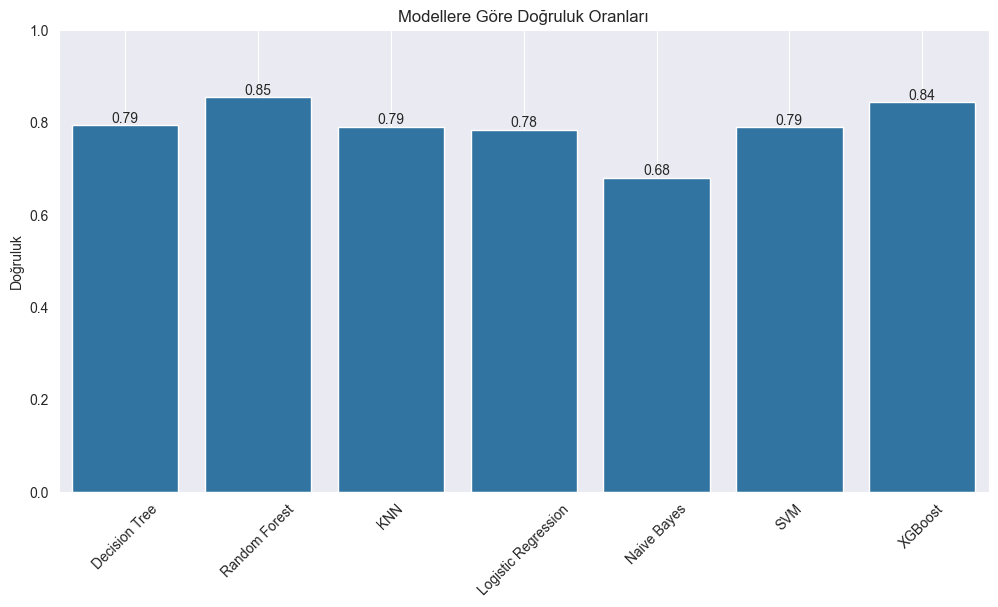

In [63]:
# Gerekli kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Makine Öğrenmesi Modelleri
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# Veri setlerini yükleme
red = pd.read_csv("winequality-red.csv", sep=";")
white = pd.read_csv("winequality-white.csv", sep=";")

# Renk bilgisini ekliyoruz (kırmızı:0, beyaz:1)
red['color'] = 0
white['color'] = 1

# İkisini birleştiriyoruz
data = pd.concat([red, white], axis=0)

# 3 sınıfa ayırıyoruz
def quality_label(q):
    if q <= 4:
        return 0  # Düşük kalite
    elif q <= 6:
        return 1  # Orta kalite
    else:
        return 2  # Yüksek kalite

data['quality'] = data['quality'].apply(quality_label)

# Özellikler ve hedef değişken
X = data.drop('quality', axis=1)
y = data['quality']

# Veriyi eğitim ve test olarak ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelleri tanımlama
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Eğitim ve Değerlendirme
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Model: {name}")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred))
    print("="*50)

# Sonuçları görselleştirme
plt.figure(figsize=(12,6))
ax = sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Modellere Göre Doğruluk Oranları')
plt.ylabel('Doğruluk')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid()

# SAYISAL DEĞERLERİ GÖSTER
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.savefig("model_dogruluk.png", dpi=300, bbox_inches='tight')
plt.show()



Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6915 - loss: 0.7367 - val_accuracy: 0.7862 - val_loss: 0.5650
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.5437 - val_accuracy: 0.7846 - val_loss: 0.5460
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7829 - loss: 0.5370 - val_accuracy: 0.7877 - val_loss: 0.5350
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - loss: 0.5344 - val_accuracy: 0.7836 - val_loss: 0.5307
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7884 - loss: 0.5123 - val_accuracy: 0.7872 - val_loss: 0.5224
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.5234 - val_accuracy: 0.7856 - val_loss: 0.5222
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7845 - loss: 0.5100 - val_accuracy: 0.7851 - val_loss: 0.5149
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.5033 - val_accuracy: 0.

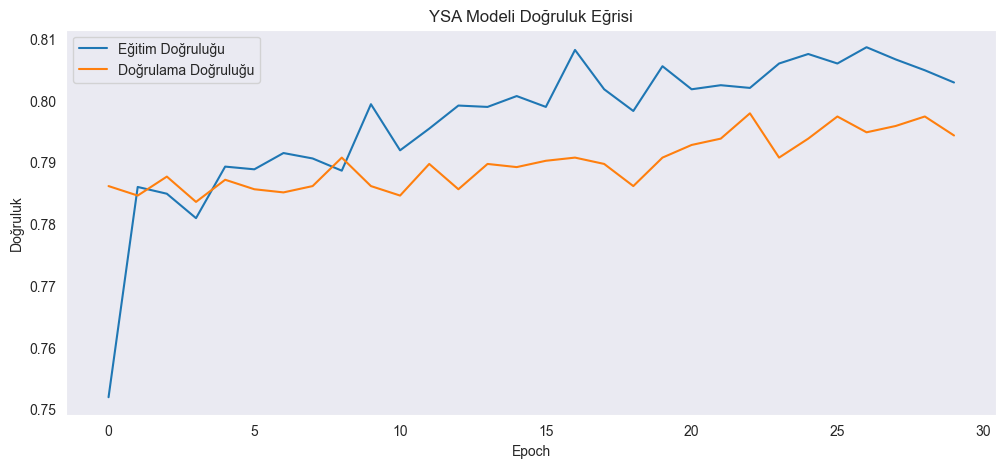

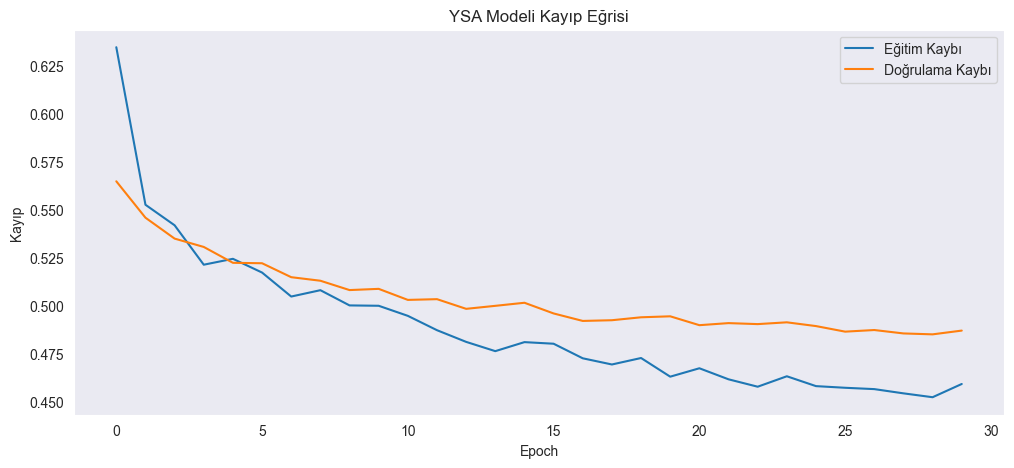

In [64]:
# Tensorflow ve Keras import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# YSA Modeli
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # 128 nöronlu gizli katman
model.add(Dropout(0.3))  # Overfitting'e karşı dropout
model.add(Dense(64, activation='relu'))  # ikinci gizli katman
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıkış katmanı

# Derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Eğitme
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('YSA Modeli Doğruluk Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid()
plt.savefig("ysa_accuracy.png", dpi=300, bbox_inches='tight')

plt.show()

# Kayıp (Loss) grafiği
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('YSA Modeli Kayıp Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid()
plt.savefig("ysa_accuracy1.png", dpi=300, bbox_inches='tight')
plt.show()


                   Precision    Recall  F1-Score
Düşük Kalite (0)    0.666667  0.162162  0.260870
Orta Kalite (1)     0.867038  0.939049  0.901608
Yüksek Kalite (2)   0.726984  0.597911  0.656160


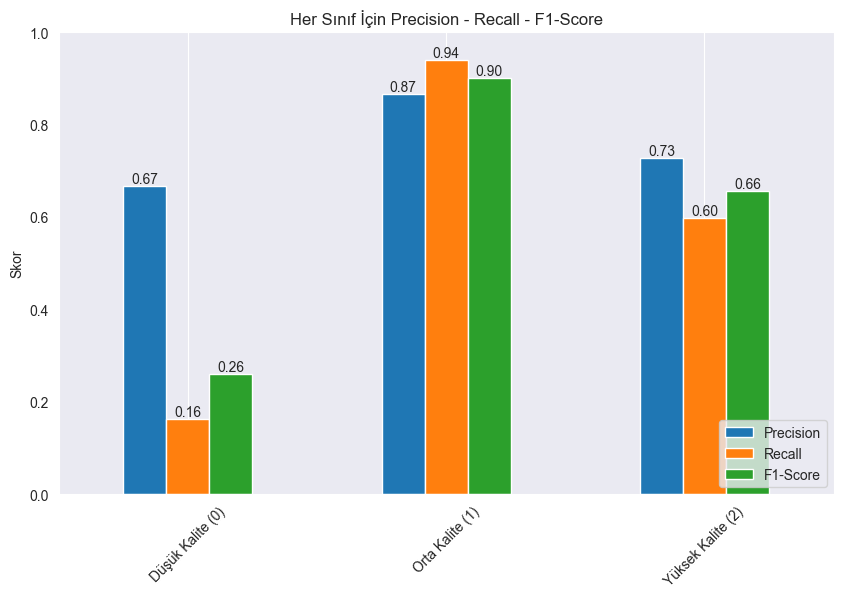

In [68]:

# Precision, Recall, F1-Score hesapla
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Her sınıf için isimlendirme
classes = ['Düşük Kalite (0)', 'Orta Kalite (1)', 'Yüksek Kalite (2)']

# Tüm sonuçları DataFrame'e koy
import pandas as pd

metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=classes)

print(metrics_df)
import matplotlib.pyplot as plt

# Grafik ayarları
ax = metrics_df.plot(kind='bar', figsize=(10,6))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title('Her Sınıf İçin Precision - Recall - F1-Score')
plt.ylabel('Skor')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.savefig("class_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

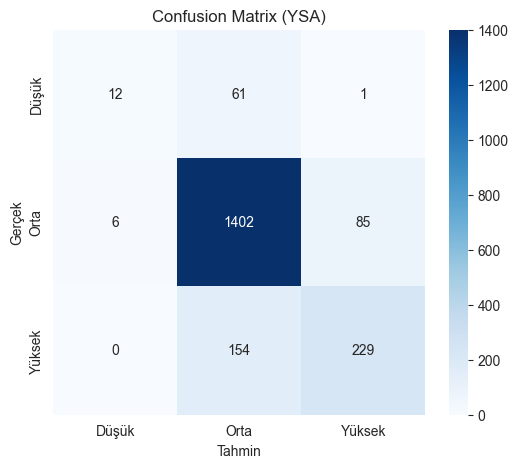

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# YSA tahminleri yapılmış olmalı:
# y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Düşük', 'Orta', 'Yüksek'],
            yticklabels=['Düşük', 'Orta', 'Yüksek'])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix (YSA)")
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


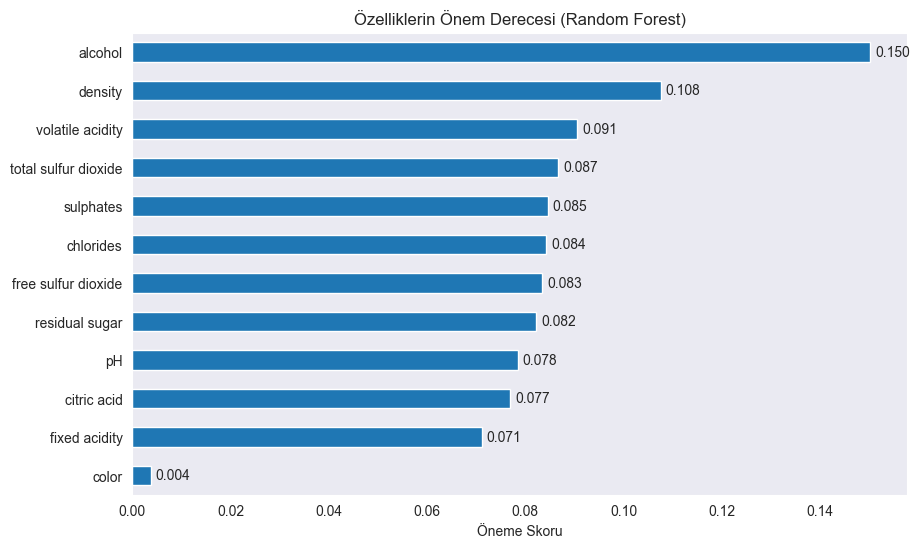

In [71]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values()

plt.figure(figsize=(10,6))
ax = feat_importance.plot(kind='barh')
plt.title("Özelliklerin Önem Derecesi (Random Forest)")
plt.xlabel("Öneme Skoru")
plt.grid()

# Barların yanına değerleri yaz
for i, (value, name) in enumerate(zip(feat_importance, feat_importance.index)):
    plt.text(value + 0.001, i, f"{value:.3f}", va='center')

plt.savefig("class_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


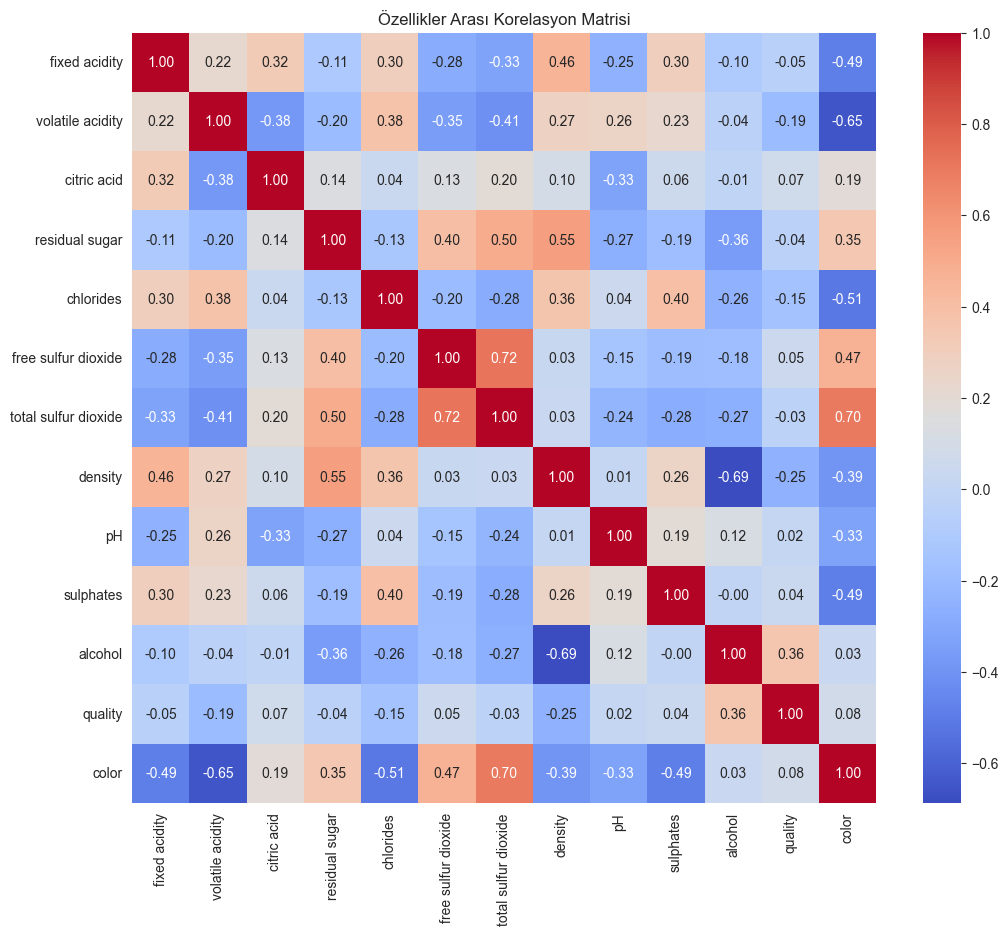

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Özellikler Arası Korelasyon Matrisi")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


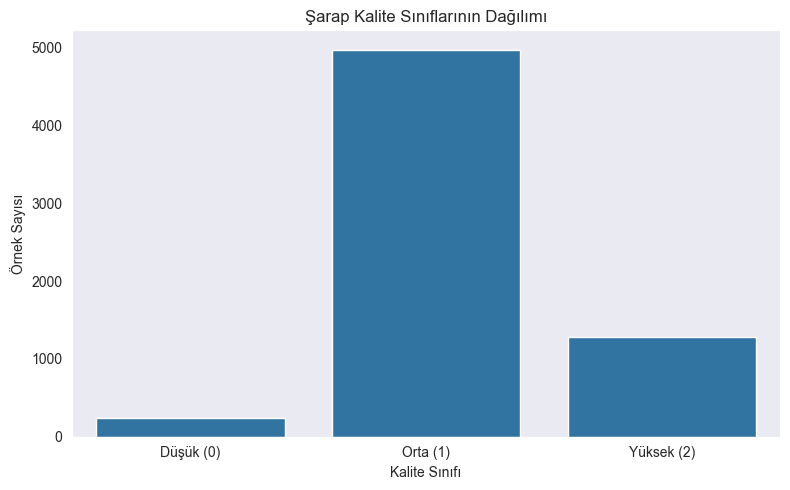

In [22]:
# Sınıf dağılımını görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = data['quality'].value_counts().sort_index()
labels = ['Düşük (0)', 'Orta (1)', 'Yüksek (2)']

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=class_counts.values)
plt.title('Şarap Kalite Sınıflarının Dağılımı')
plt.ylabel('Örnek Sayısı')
plt.xlabel('Kalite Sınıfı')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("class_balance.png", dpi=300)
plt.show()


In [23]:
from sklearn.metrics import precision_recall_fscore_support

# Performans sonuçlarını saklamak için liste
metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    metrics.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4)
    })

# Sonuçları DataFrame olarak göster
results_df = pd.DataFrame(metrics).sort_values(by='Accuracy', ascending=False)
print(results_df)


                 Model  Accuracy  Precision  Recall  F1-Score
1        Random Forest    0.8487     0.8429  0.8487    0.8303
6              XGBoost    0.8426     0.8319  0.8426    0.8291
0        Decision Tree    0.8000     0.8003  0.8000    0.8001
2                  KNN    0.7903     0.7697  0.7903    0.7761
5                  SVM    0.7882     0.7383  0.7882    0.7455
3  Logistic Regression    0.7836     0.7493  0.7836    0.7465
4          Naive Bayes    0.6795     0.7354  0.6795    0.6970


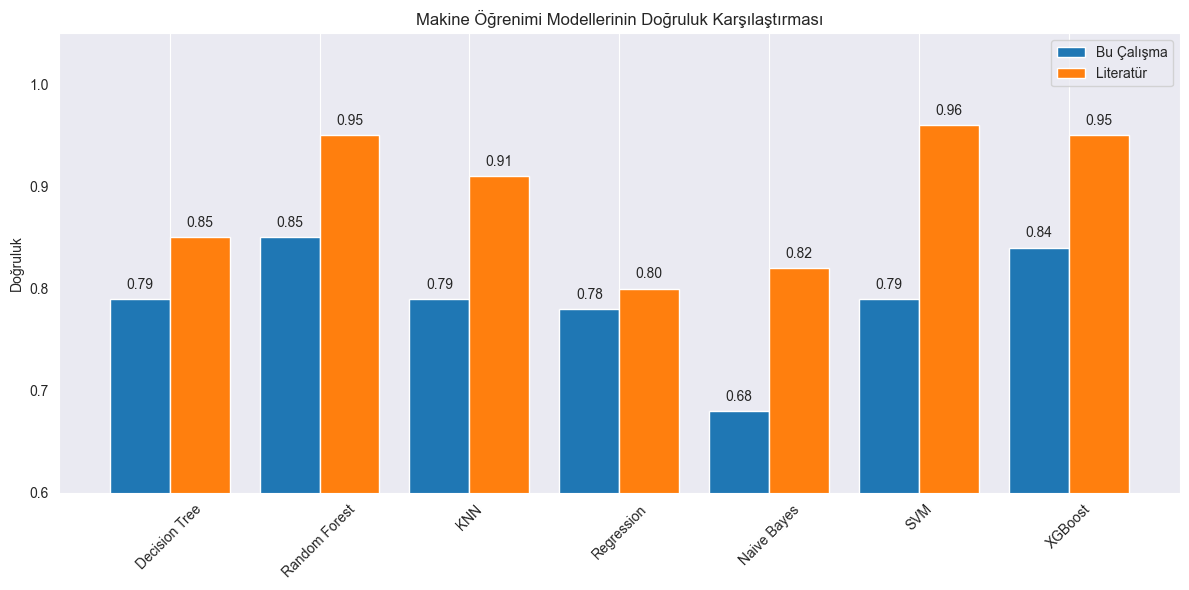

In [73]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest', 'KNN', 'Regression', 'Naive Bayes', 'SVM', 'XGBoost']
your_scores = [0.79, 0.85, 0.79, 0.78, 0.68, 0.79, 0.84]
literature_scores = [0.85, 0.95, 0.91, 0.80, 0.82, 0.96, 0.95]

x = range(len(models))

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x, your_scores, width=0.4, label='Bu Çalışma', align='center')
bars2 = plt.bar([i + 0.4 for i in x], literature_scores, width=0.4, label='Literatür', align='center')

plt.xticks([i + 0.2 for i in x], models, rotation=45)
plt.ylabel('Doğruluk')
plt.ylim(0.6, 1.05)
plt.title('Makine Öğrenimi Modellerinin Doğruluk Karşılaştırması')
plt.legend()
plt.grid(axis='y')

# Barların üzerine değer yaz
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center')

plt.tight_layout()
plt.savefig("dogruluk_karsilastirma_grafigi_sayili.png", dpi=300)
plt.show()
